Equation: a = argmax(mean reward for each arm + exploration parameter(sqrt(log(total steps))/steps for each arm))<br>
def init(self, # of arms, exploration parameter, iterations)<br>
    &nbsp;&nbsp;&nbsp;set parameters<br>
    &nbsp;&nbsp;&nbsp;total steps counter<br>
    &nbsp;&nbsp;&nbsp;array of counters for each time arm is chosen<br>
    &nbsp;&nbsp;&nbsp;total mean reward<br>
    &nbsp;&nbsp;&nbsp;total mean reward for each arm<br>
    &nbsp;&nbsp;&nbsp;total mean reward for each iteration<br>
    &nbsp;&nbsp;&nbsp;reward distribution: normal from 0 to 1, size is # of arms<br>
    
def action(self)<br>
    &nbsp;&nbsp;&nbsp;action = Equation<br>
    &nbsp;&nbsp;&nbsp;reward = normal from chosen arm's value to 1<br>
    &nbsp;&nbsp;&nbsp;increment both counters<br>
    &nbsp;&nbsp;&nbsp;update total reward and chosen arm reward<br>
    
def run(self)<br>
    &nbsp;&nbsp;&nbsp;for i in range iterations:<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;action()<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;update mean reward for each iteration<br>
        
def reset(self)<br>
    &nbsp;&nbsp;&nbsp;reset everything to default<br>
    
set # of experiments<br>
set array to keep average of iterations for each experiment<br>
initialize ucb<br>
for i in range of experiments<br>
    &nbsp;&nbsp;&nbsp;reset<br>
    &nbsp;&nbsp;&nbsp;run<br>
    &nbsp;&nbsp;&nbsp;update averages for experiments<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
class UCB_Algorithm:
    def __init__(self, num_arms, exploration_parameter, iters):
        #Number of arms
        self.num_arms = num_arms
        # Value of exploration parameter (c)
        self.exploration_parameter = exploration_parameter
        # Number of iterations
        self.iters = iters
        # Number of total steps
        self.total_steps = 1
        # Number of steps for each arm
        self.arm_steps = np.ones(num_arms)
        # Total mean reward from all arms
        self.mean_reward = 0
        # Total reward for each arm
        self.arm_rewards = np.zeros(num_arms)
        # Total mean rewards for each iteration
        self.iter_rewards = np.zeros(iters)
        # Reward distribution used
        self.reward_distrib = np.random.normal(0, 1, self.num_arms)
        
    def action(self):
        # Equation finds where max reward will come from
        action = np.argmax(self.arm_rewards + self.exploration_parameter * np.sqrt((np.log(self.total_steps))
                                                                                 / self.arm_steps))
        # Get reward for chosen action
        reward = np.random.normal(self.reward_distrib[action], 1)
        # Increment total steps and steps for arm chosen in action
        self.total_steps += 1
        self.arm_steps[action] += 1
        # Update total mean reward and reward for chosen arm
        self.mean_reward = self.mean_reward + (reward-self.mean_reward) / self.total_steps
        self.arm_rewards[action] = self.arm_rewards[action] + (reward - self.arm_rewards[action]) /self.arm_steps[action]

    def run(self):
        # Run algorithm for number of iterations specified
        for i in range(self.iters):
            self.action()
            self.iter_rewards[i] = self.mean_reward
            
    def reset(self):
        # Resets to defaults to prepare for next experiment
        self.total_steps = 1
        self.arm_steps = np.ones(self.num_arms)
        self.mean_reward = 0
        self.arm_rewards = np.zeros(self.num_arms)
        self.iter_rewards = np.zeros(iters)
        self.reward_distrib = np.random.normal(0, 1, self.num_arms)

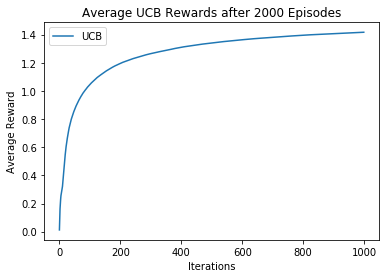

In [29]:
num_arms = 10
iters = 1000

# Experiment averages
ucb_rewards = np.zeros(iters)
# Initialize bandits
ucb = UCB_Algorithm(num_arms, 2, iters)

experiments = 2000
# Run experiments
for i in range(experiments):
    ucb.reset()
    # Run experiments
    ucb.run()
    
    # Update averages
    ucb_rewards = ucb_rewards + (ucb.iter_rewards - ucb_rewards) / (i + 1)

plt.figure()
plt.plot(ucb_rewards, label="UCB")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average UCB Rewards after " 
          + str(episodes) + " Episodes")
plt.show()

In [23]:
percentages = np.array([ucb.arm_steps]) / iters * 100
df = pd.DataFrame(np.vstack(
    [percentages.round(1),ucb.arm_rewards.round(2)]),
        index=["UCB Percentage","Expected Reward"],
        columns=["a = " + str(x) for x in range(0, num_arms)])
df

,a = 0,a = 1,a = 2,a = 3,a = 4,a = 5,a = 6,a = 7,a = 8,a = 9
UCB Percentage,1.00,17.90,4.00,0.90,0.4,0.7,10.90,61.50,1.40,2.30
Expected Reward,-0.83,0.49,0.04,-0.88,-1.8,-1.2,0.37,0.67,-0.64,-0.24
